In [1]:
import numpy as np
import data1D
from reservoir import Reservoir
from sklearn.model_selection import GridSearchCV
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline

In [2]:
b = Reservoir(n_res=2000, res_scale=0.705, res_encoding='phase',
              input_enc_param=np.pi, res_enc_param=np.pi,
              input_scale=0.537, input_encoding='phase',
              scale_input_MinMax = (0, 1), scale_output_MinMax = (0, 1), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              random_projection='simulation', weights_type='complex gaussian',
              activation_fun='intensity_in_tanh', activation_param=None,
              parallel_runs=1, parallel_test_runs = 200, bias_scale=0, leak_rate=0,
              pred_horizon=1, rec_pred_steps=200, forget = 500,
              train_method='ridge', train_param=0.25, verbose=0,
              gridsearch = True
             )

In [3]:
ks_data, xx_, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=6000, n_sequence=1)
ks_data = data_utils.scale(ks_data, [0, 1])
input_shape = ks_data.shape
input_data = ks_data.reshape((input_shape[1], input_shape[0], input_shape[2]))

In [4]:
params = [
    {
        'train_param': [0.25, 0.5, 1],
        'leak_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
        'res_scale': np.linspace(0.2, 1, 15),
        'input_scale': np.linspace(0.2, 1, 15)

    }
]

In [5]:
ctanh = GridSearchCV(estimator=b, param_grid=params, return_train_score=True, cv=3, n_jobs=-1, verbose=2)
ctanh.fit(input_data)

print(ctanh.best_params_)

Fitting 3 folds for each of 3375 candidates, totalling 10125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 56 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 253 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 152.3min
[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 249.6min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed: 367.8min
[Parallel(n_jobs=-1)]: Done 1873 tasks      | elapsed: 504.7min
[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed: 666.5min
[Parallel(n_jobs=-1)]: Done 3169 tasks      | elapsed: 850.7min
[Parallel(n_jobs=-1)]: Done 3938 tasks      | elapsed: 1051.0min
[Parallel(n_jobs=-1)]: Done 4789 tasks      | elapsed: 1278.2min
[Parallel(n_jobs=-1)]: Done 5720 tasks      | elapsed: 1525.0min
[Parallel(n_jobs=-1)]: Done 6733 tasks      | elapsed: 1793.2min
[Parallel(n_jobs=-1)]: Done 7826 tasks      | elapsed: 2084.4min
[Parallel(n_jobs=-1)]: Done 9001 tasks      | elapsed: 2396.6min
[Parallel(n_jobs=-1)]: Done

{'input_scale': 0.6571428571428573, 'leak_rate': 0.3, 'res_scale': 0.5428571428571429, 'train_param': 0.25}


In [6]:
ctanh.best_score_

0.7021020457777695

In [7]:
ctanh.best_params_

{'input_scale': 0.6571428571428573,
 'leak_rate': 0.3,
 'res_scale': 0.5428571428571429,
 'train_param': 0.25}

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

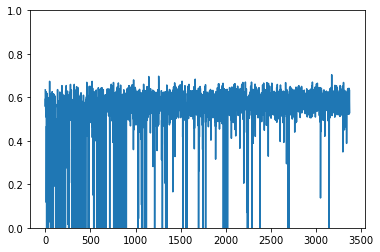

In [10]:
plt.plot(ctanh.cv_results_['split2_test_score'])
plt.ylim(bottom=0);
plt.ylim(top=1);

In [11]:
input_scale = np.array([ctanh.cv_results_['params'][i]['input_scale'] for i in range(len(ctanh.cv_results_['params']))])
res_scale = np.array([ctanh.cv_results_['params'][i]['res_scale'] for i in range(len(ctanh.cv_results_['params']))])
split2_test_score = ctanh.cv_results_['split2_test_score']

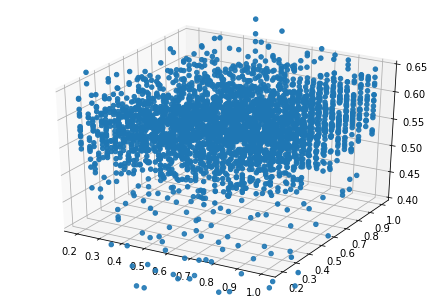

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(input_scale, res_scale, split2_test_score, vmin=0, vmax=1)
ax.set_zlim((0.4,0.65))
plt.show()